In [4]:
import os
import pandas_datareader as pdr
from os.path import join, dirname
from dotenv import load_dotenv

load_dotenv(verbose=True)
load_dotenv('.env')

tiingo_token = os.environ.get("TIINGO_TOKE")

In [5]:
df = pdr.get_data_tiingo('SPXL', api_key=tiingo_token)
api_df = df

In [6]:
api_df

close     high      low     open   volume  \
symbol date                                                                   
SPXL   2016-02-16 00:00:00+00:00  65.30  65.3400  63.1900  64.3800  2201456   
       2016-02-17 00:00:00+00:00  68.51  68.9900  66.6188  66.7000  3026803   
       2016-02-18 00:00:00+00:00  67.65  68.9500  67.2800  68.8700  1905004   
       2016-02-19 00:00:00+00:00  67.64  67.7600  65.9400  66.7100  2045658   
       2016-02-22 00:00:00+00:00  70.47  70.6999  69.4800  69.5700  1660063   
...                                 ...      ...      ...      ...      ...   
       2021-02-08 00:00:00+00:00  81.45  81.4700  80.1200  80.7100  4063660   
       2021-02-09 00:00:00+00:00  81.25  81.6700  80.6200  80.8700  4017694   
       2021-02-10 00:00:00+00:00  81.15  82.5600  79.6000  82.5300  5925825   
       2021-02-11 00:00:00+00:00  81.55  82.1700  79.9500  81.9100  5392135   
       2021-02-12 00:00:00+00:00  82.78  82.9199  80.9900  81.0181  3949215   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
SPXL   2016-02-16 00:00:00+00:00  15.375275  15.384693  14.878463  15.158655   
       2016-02-17 00:00:00+00:00  16.131088  16.244107  15.685794  15.704913   
       2016-02-18 00:00:00+00:00  15.928596  16.234689  15.841477  16.215852   
       2016-02-19 00:00:00+00:00  15.926242  15.954496  15.525966  15.707268   
       2016-02-22 00:00:00+00:00  16.592582  16.646713  16.359481  16.380672   
...                                     ...        ...        ...        ...   
       2021-02-08 00:00:00+00:00  81.450000  81.470000  80.120000  80.710000   
       2021-02-09 00:00:00+00:00  81.250000  81.670000  80.620000  80.870000   
       2021-02-10 00:00:00+00:00  81.150000  82.560000  79.600000  82.530000   
       2021-02-11 00:00:00+00:00  81.550000  82.170000  79.950000  81.910000   
       2021-02-12 00:00:00+00:00  82.780000  82.919900  80.990000  81.018100   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
SPXL   2016-02-16 00:00:00+00:00    8805824      0.0          1.0  
       2016-02-17 00:00:00+00:00   12107212      0.0          1.0  
       2016-02-18 00:00:00+00:00    7620016      0.0          1.0  
       2016-02-19 00:00:00+00:00    8182632      0.0          1.0  
       2016-02-22 00:00:00+00:00    6640252      0.0          1.0  
...                                     ...      ...          ...  
       2021-02-08 00:00:00+00:00    4063660      0.0          1.0  
       2021-02-09 00:00:00+00:00    4017694      0.0          1.0  
       2021-02-10 00:00:00+00:00    5925825      0.0          1.0  
       2021-02-11 00:00:00+00:00    5392135      0.0          1.0  
       2021-02-12 00:00:00+00:00    3949215      0.0          1.0  

[1259 rows x 12 columns]

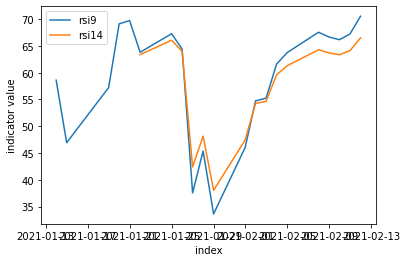

In [7]:
from stock_pandas import StockDataFrame
import matplotlib.pyplot as plt

df=api_df.tail(30)

stock = StockDataFrame(df.copy())
stock.exec('rsi:14', create_column=True)
stock.exec('rsi:9', create_column=True)
stock = stock.reset_index()
stock = stock.set_index('date')

plt.plot(stock['rsi:9'],label='rsi9')
plt.plot(stock['rsi:14'],label='rsi14')
plt.xlabel('index')
plt.ylabel('indicator value')
plt.legend()
plt.show()

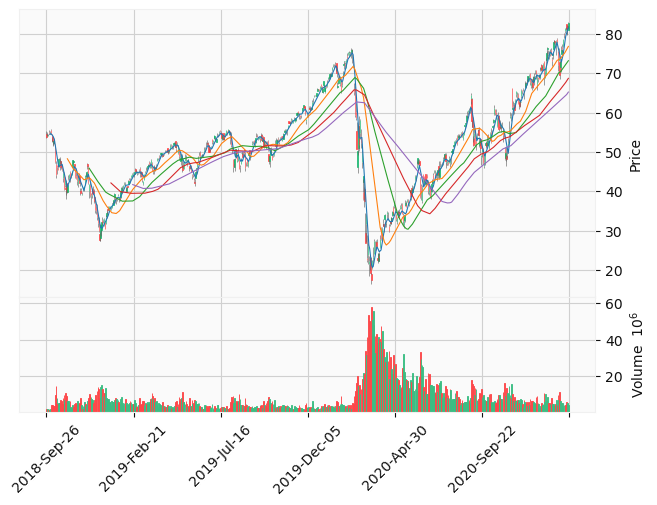

In [8]:
df=api_df.tail(600)
df = df.reset_index(level=[0,1])
df = df.rename(columns={
        'date': 'Date',
        'close': 'Close',
        'high': 'High',
        'low': 'Low',
        'open': 'Open',
        'volume': 'Volume',
        'adjClose': 'Adj Close',
})
df = df.set_index('Date')
df.shape

df = df.loc[:,['Open','High','Low','Close','Volume','Adj Close']]

import mplfinance as mpf
mpf.plot(df,type='candle',mav=(5,25,50,75,100) ,volume=True,style='yahoo')
